## Determinantal Point Process

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.stats import multivariate_normal
from scipy.interpolate import fitpack,bisplrep,bisplev
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print ("Packages loaded.")

Packages loaded.


### Util

In [2]:
def kernel_se(X1,X2,hyp={'g':1,'l':1}):
    """
        Squared exponential (SE) kernel function
    """
    K = hyp['g']*np.exp(-cdist(X1,X2,'sqeuclidean')/(2*hyp['l']*hyp['l']))
    return K
print ("Done.")

Done.


### Original k-DPP Implementation

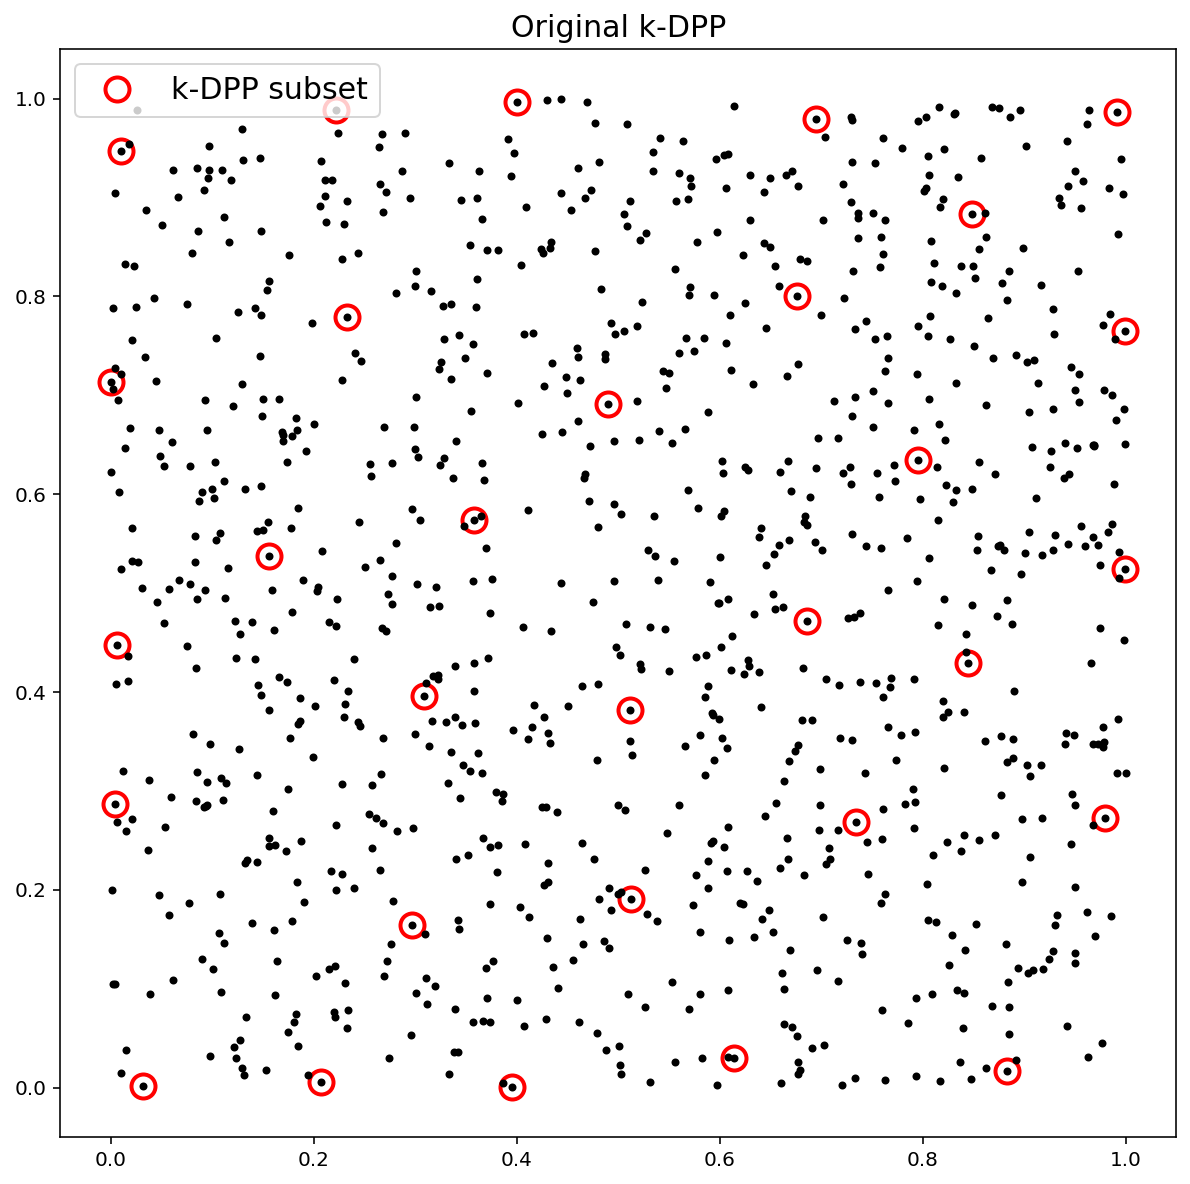

In [19]:
# Total set
xs_total = np.random.rand(1000,2)

# k-DPP
n_select    = 30
n_total     = xs_total.shape[0]
idxs_remain = np.arange(0,n_total,1,dtype=np.int32)
idxs_select = []
for i_idx in range(n_select):
    if i_idx == 0:
        idx_select = np.random.permutation(n_total)[0]
    else:
        xs_select = xs_total[idxs_select,:]
        n_remain  = len(idxs_remain)
        dets      = np.zeros(shape=n_remain)
        for r_idx in range(n_remain): # for the remained indices
            idx_remain = idxs_remain[r_idx]
            x_remain   = xs_total[idx_remain,:].reshape(1,-1)
            # Stack
            xs_check   = np.concatenate((xs_select,x_remain),axis=0)
            # Compute the determinant of the kernel matrix
            K_check    = kernel_se(xs_check,xs_check,hyp={'g':1,'l':0.1})
            det_check  = np.linalg.det(K_check)
            # Append the determinant
            dets[r_idx] = det_check
        # Get the index with the highest determinant
        idx_select = idxs_remain[np.where(dets == np.amax(dets))[0][0]]
    # Remove currently selected index from 'idxs_remain'
    idxs_remain = idxs_remain[idxs_remain != idx_select]
    # Append currently selected index to 'idxs_select'
    idxs_select.append(idx_select)

# Select the subset from 'xs_total'
idxs_select = np.array(idxs_select)
xs_select   = xs_total[idxs_select]

# Plot
plt.figure(figsize=(10,10))
plt.plot(xs_select[:,0],xs_select[:,1],
         'o',color='r',ms=12,mfc='None',mec='r',markeredgewidth=2,
         label='k-DPP subset')
plt.plot(xs_total[:,0],xs_total[:,1],'.',color='k')
plt.title("Original k-DPP",fontsize=15)
plt.legend(fontsize=15,loc='upper left')
plt.show()